<a href="https://colab.research.google.com/github/melisamichuki01/moringa_project/blob/master/Hass_Consulting_Company_Moringa_Project_Melisa_Michuki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defining the question.

## The analytical question.


>As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables.

## Metric of success

As we try to solve our research problem,we will carry out the following procedures:

>a) We will carry out univariate analysis where will plot pie charts and bar graphs to understand the data more.

>b)We will also plot scatter plots and histograms to understand the relationship between variables during bivariate analysis

>We will carry out multivariate analysis and record our observations.

>We will also performing regression analysis where we will incorporate categorical independent variables into your models and check for multicollinearity.


## Experimental design

We will be then required to provide your observations and recommendation on the suitability of each of the tested models on their appropriateness of solving the given problem through;

> * Multiple Linear Regression  
* Quantile Regression  
* Ridge Regression  
* Lasso Regression  
* Elastic Net Regression

## Data relevance

The data provided for this study is suitable to carry out the analysis and provide the information required.Below is the dataset glossary:
>* Id price  
*Price of the house  
*bedrooms - Number of Bedrooms  
*bathrooms - Number of Bathrooms  
*sqft_living - Square feet area of living area  
*sqft_lot  - Square feet area of parking Layout  
*floors - Number of Floors  
*waterfront - Whether waterfront is there or not  
*view - Number of Views  
*grade - Grades  
*sqft_above  
*sqft_basement - Square feet area off basement  
*yr_built - Year the house is built  
*yr_renovated - Year the house is renovated  
*zipcode - zipcode os the house  
*lat : Latitude of the house  
*lon : Longitude of the house  
*sqft_living15
*sqft_lot15




# Loading our dataset

In [0]:
# Below is a preview of the data we will be working with
# -------
# we will first import the libraries required
#-------# we first import the necessary libraries

import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
plt.style.use('dark_background')

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error,  r2_score
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold, LeaveOneOut
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score,RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# loading in the datasets
#-----

df = pd.read_csv('/content/Independent Project Week 7 - house_data.csv')
df.head(5)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Checking the data 

In [0]:
# Check the head of the data 
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [0]:
# Check the tail of the data
df.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [0]:
# Summary of data 
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Tidying the dataset

In [0]:
# Check the shape of our dataset
df.shape

(21613, 20)

In [0]:
df.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [0]:
df.nunique()

id               21436
price             3625
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

## Consistency

In [0]:
# Checking for duplicate values in the  dataframe.
#
df.duplicated().values.any()

True

In [0]:
# Drop duplicates
df = df.drop_duplicates()

In [0]:
# Check for any duplicates
df.duplicated().values.any()

False

From our previous processes,we have observed that the merged dataset has no duplicate hence we move to check for any null values.

## Completeness

In [0]:
# Checking for null values
#
# ----
df.isnull().values.any()

False

## Validity and Uniformity

In [0]:
# Drop unnecesary columns 
# 
df = df.drop(["id","zipcode","lat","long"],axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503


In [0]:
# We remove whitespaces from our rows
# We also ensure that our rows are of the same case
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('.', '_').str.replace(',','')
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503


In [0]:
float_col = df.select_dtypes(include=['float64']) # This will select float columns only
# list(float_col.columns.values)
for col in float_col.columns.values:
  df[col] = df[col].astype('int64')
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,1340,5650
1,538000,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,1690,7639
2,180000,2,1,770,10000,1,0,0,3,6,770,0,1933,0,2720,8062
3,604000,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,1360,5000
4,510000,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,1800,7503


## Outliers

Outlier ranges for numerical value for merged dataset.
 [[1230000, 2000000, 1350000, 1330000, 1450000, 2250000, 1510000, 2400000, 2900000, 1370000, 2050000, 3080000, 2380000, 1380000, 1400000, 1350000, 1550000, 1300000, 1450000, 1200000, 1150000, 1390000, 1280000, 1200000, 1490000, 2250000, 1600000, 2130000, 1450000, 1950000, 1220000, 3070000, 1250000, 1150000, 1480000, 1580000, 1300000, 1310000, 2250000, 1360000, 1220000, 2400000, 1270000, 1200000, 1320000, 2450000, 1240000, 1570000, 1200000, 1280000, 1960000, 1750000, 5110000, 1150000, 1880000, 1230000, 2300000, 2260000, 5300000, 1200000, 2200000, 1180000, 1700000, 1400000, 2540000, 1360000, 1230000, 5350000, 1330000, 1220000, 1250000, 1300000, 1180000, 1380000, 1150000, 1200000, 2250000, 1230000, 1270000, 1680000, 1930000, 1180000, 2350000, 1140000, 1320000, 1430000, 1530000, 1570000, 1580000, 1250000, 1720000, 2400000, 1600000, 1480000, 2530000, 1570000, 1200000, 1250000, 3850000, 1200000, 1640000, 1330000, 1740000, 1700000, 165000

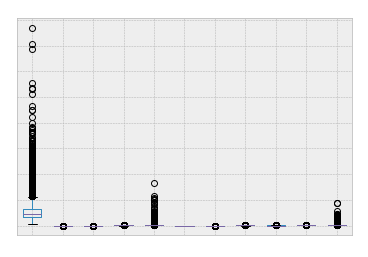

In [0]:
# Checking and plotting out anomalies

plt.style.use('bmh')

numerical_df = df[["price","bedrooms","bathrooms","sqft_living","sqft_lot","floors","grade","sqft_above","sqft_basement","sqft_living15","sqft_lot15"]]
_t, df_outliers = pd.DataFrame.boxplot(numerical_df, return_type="both", widths=0.6)

outliers = [flier.get_ydata() for flier in df_outliers["fliers"]]
out_liers = [i.tolist() for i in outliers]


print("Outlier ranges for numerical value for merged dataset.\n", out_liers)

In [0]:
# Function for counting number of outliers in our data columns and cheking the percentage for each
# ----
#

def detect_outlier(data):
    outliers=[]
    threshold=3
    mean_1 = np.mean(data)
    std_1 =np.std(data)
    
    for y in data:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [0]:
# Counting number of outliers in our data columns and cheking the percentage for each column using z-score
#
#
for col in numerical_df:
    rows, columns = numerical_df.shape
    percent_coefficient = float(100 / rows)
    outliers = detect_outlier(numerical_df[col])
    outliers_count = len(outliers)
    outliers_percentage = outliers_count * percent_coefficient
    print(f"{col} has {outliers_count} outliers in total, which is {outliers_percentage:.2}% of data")

price has 406 outliers in total, which is 1.9% of data
bedrooms has 75 outliers in total, which is 0.35% of data
bathrooms has 402 outliers in total, which is 1.9% of data
sqft_living has 248 outliers in total, which is 1.1% of data
sqft_lot has 347 outliers in total, which is 1.6% of data
floors has 0 outliers in total, which is 0.0% of data
grade has 136 outliers in total, which is 0.63% of data
sqft_above has 254 outliers in total, which is 1.2% of data
sqft_basement has 247 outliers in total, which is 1.1% of data
sqft_living15 has 237 outliers in total, which is 1.1% of data
sqft_lot15 has 363 outliers in total, which is 1.7% of data


The above code's output shows the outliers in our dataset and their percentage in relation number.We then drop the outliers to prevent them affecting any of the central tendencies in our data.

In [0]:
# Dropping ouliers from our dataframe using a z-test
#
from scipy import stats

z = np.abs(stats.zscore(numerical_df))
print(z)

[[0.8663502  0.39872223 1.02022089 ... 0.65870366 0.94325844 0.2607194 ]
 [0.00593105 0.39872223 0.3405354  ... 0.24507456 0.43261512 0.18787651]
 [0.98040133 1.4738891  1.02022089 ... 0.65870366 1.07013523 0.17238503]
 ...
 [0.37584596 1.4738891  2.38097719 ... 0.65870366 1.41013234 0.39413652]
 [0.38156485 0.39872223 0.3405354  ... 0.65870366 0.84112978 0.42050499]
 [0.58571365 1.4738891  2.38097719 ... 0.65870366 1.41013234 0.41794139]]


In [0]:
# Confirming that our outliers have been dropped from the dataset.
#
df_o = numerical_df[(z < 3).all(axis=1)]

print(f"Previous dataframe size : {numerical_df.shape[0]}")
print(f"New dataframe size: {df_o.shape[0]}")

Previous dataframe size : 21610
New dataframe size: 20127


In [0]:
# Saving our Data without outliers
#
numerical_df.to_csv("DF.csv")

# Exploratory Data Analysis

In [0]:
# Loading our dataset and creating a dataframe.
# previewing our column names.
#
# ----
#
DF = pd.read_csv("/content/DF.csv")
DF.columns

Index(['Unnamed: 0', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'grade', 'sqft_above', 'sqft_basement',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [0]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [0]:
# Adding others variables to our clean dataframe

DF[["price","bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view","condition","grade","sqft_above","sqft_basement","yr_built","yr_renovated","sqft_living15","sqft_lot15"]] = df[["price","bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view","condition","grade","sqft_above","sqft_basement","yr_built","yr_renovated","sqft_living15","sqft_lot15"]]

# Previewing the head of our data
DF.head()

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,waterfront,view,condition,yr_built,yr_renovated
0,0,221900.0,3.0,1.0,1180.0,5650.0,1.0,7.0,1180.0,0.0,1340.0,5650.0,0.0,0.0,3.0,1955.0,0.0
1,1,538000.0,3.0,2.0,2570.0,7242.0,2.0,7.0,2170.0,400.0,1690.0,7639.0,0.0,0.0,3.0,1951.0,1991.0
2,2,180000.0,2.0,1.0,770.0,10000.0,1.0,6.0,770.0,0.0,2720.0,8062.0,0.0,0.0,3.0,1933.0,0.0
3,3,604000.0,4.0,3.0,1960.0,5000.0,1.0,7.0,1050.0,910.0,1360.0,5000.0,0.0,0.0,5.0,1965.0,0.0
4,4,510000.0,3.0,2.0,1680.0,8080.0,1.0,8.0,1680.0,0.0,1800.0,7503.0,0.0,0.0,3.0,1987.0,0.0


In [0]:
# Checking for null values
#
# ----
DF.isnull().values.any()

True

In [0]:
DF  = DF.fillna(0)

In [0]:
float_col = DF.select_dtypes(include=['float64']) # This will select float columns only
#list(float_col.columns.values)
for col in float_col.columns.values:
  DF[col] = DF[col].astype('int64')
DF.head()

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,waterfront,view,condition,yr_built,yr_renovated
0,0,221900,3,1,1180,5650,1,7,1180,0,1340,5650,0,0,3,1955,0
1,1,538000,3,2,2570,7242,2,7,2170,400,1690,7639,0,0,3,1951,1991
2,2,180000,2,1,770,10000,1,6,770,0,2720,8062,0,0,3,1933,0
3,3,604000,4,3,1960,5000,1,7,1050,910,1360,5000,0,0,5,1965,0
4,4,510000,3,2,1680,8080,1,8,1680,0,1800,7503,0,0,3,1987,0


## Univariate analysis

### Central tendencies

In [0]:
# Summary of the numerical values in our dataset
#
DF.describe()


,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,waterfront,view,condition,yr_built,yr_renovated
count,21610.000000,2.161000e+04,21610.000000,21610.000000,21610.000000,2.161000e+04,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000
mean,10805.695974,5.401268e+05,3.370523,1.749653,2079.712772,1.510807e+04,1.445858,7.655761,1788.179454,291.533318,1986.359047,12768.816752,0.007543,0.234197,3.409024,1970.724988,84.322351
std,6239.156970,3.674374e+05,0.930860,0.734997,918.764776,4.142330e+04,0.552118,1.178937,828.372768,442.596699,685.751046,27306.066735,0.086523,0.766136,0.651985,37.441050,401.499264
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5403.250000,3.211452e+05,3.000000,1.000000,1422.750000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,1490.000000,5100.000000,0.000000,0.000000,3.000000,1951.000000,0.000000
50%,10805.500000,4.500000e+05,3.000000,2.000000,1910.000000,7.619000e+03,1.000000,7.000000,1560.000000,0.000000,1840.000000,7620.000000,0.000000,0.000000,3.000000,1975.000000,0.000000
75%,16208.750000,6.450000e+05,4.000000,2.000000,2550.000000,1.068875e+04,2.000000,8.000000,2210.000000,560.000000,2360.000000,10083.000000,0.000000,0.000000,4.000000,1997.000000,0.000000
max,21612.000000,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.000000,13.000000,9410.000000,4820.000000,6210.000000,871200.000000,1.000000,4.000000,5.000000,2015.000000,2015.000000


In [0]:
# Summary of the prices in relation to the year they were built
#
DF.groupby('yr_built')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
yr_built,,,,,,,,
0,3.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
1900,87.0,581536.632184,294756.372158,130000.0,420000.0,549000.0,715250.00,1700000.0
1901,29.0,557108.344828,195369.979938,285000.0,410000.0,550000.0,625000.00,1230000.0
1902,27.0,673192.592593,364053.388599,260000.0,446475.0,624000.0,766125.00,1990000.0
1903,46.0,480958.195652,203860.965464,167500.0,330000.0,461000.0,576758.75,1020000.0
...,...,...,...,...,...,...,...,...
2011,130.0,544648.384615,316024.697823,249000.0,359875.0,440000.0,664000.00,2580000.0
2012,170.0,527436.982353,280522.303238,160797.0,333472.0,448475.0,643722.00,2000000.0
2013,201.0,678599.582090,447055.316738,155000.0,380000.0,565000.0,799900.00,3000000.0


### Frequency tables

In [0]:
categorical = DF[["grade","waterfront","view","condition","yr_built","yr_renovated"]]

for col in categorical:
    print(DF[col].value_counts())
    print("\n")

7     8979
8     6065
9     2614
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
0        3
1        1
Name: grade, dtype: int64


0    21447
1      163
Name: waterfront, dtype: int64


0    19487
2      963
3      509
1      332
4      319
Name: view, dtype: int64


3    14026
4     5678
5     1701
2      172
1       30
0        3
Name: condition, dtype: int64


2014    559
2006    454
2005    450
2004    432
2003    422
       ... 
1901     29
1902     27
1935     24
1934     21
0         3
Name: yr_built, Length: 117, dtype: int64


0       20697
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64




### Frequency distribution

In [0]:
n_categorical = categorical[["grade","waterfront","view","condition"]]

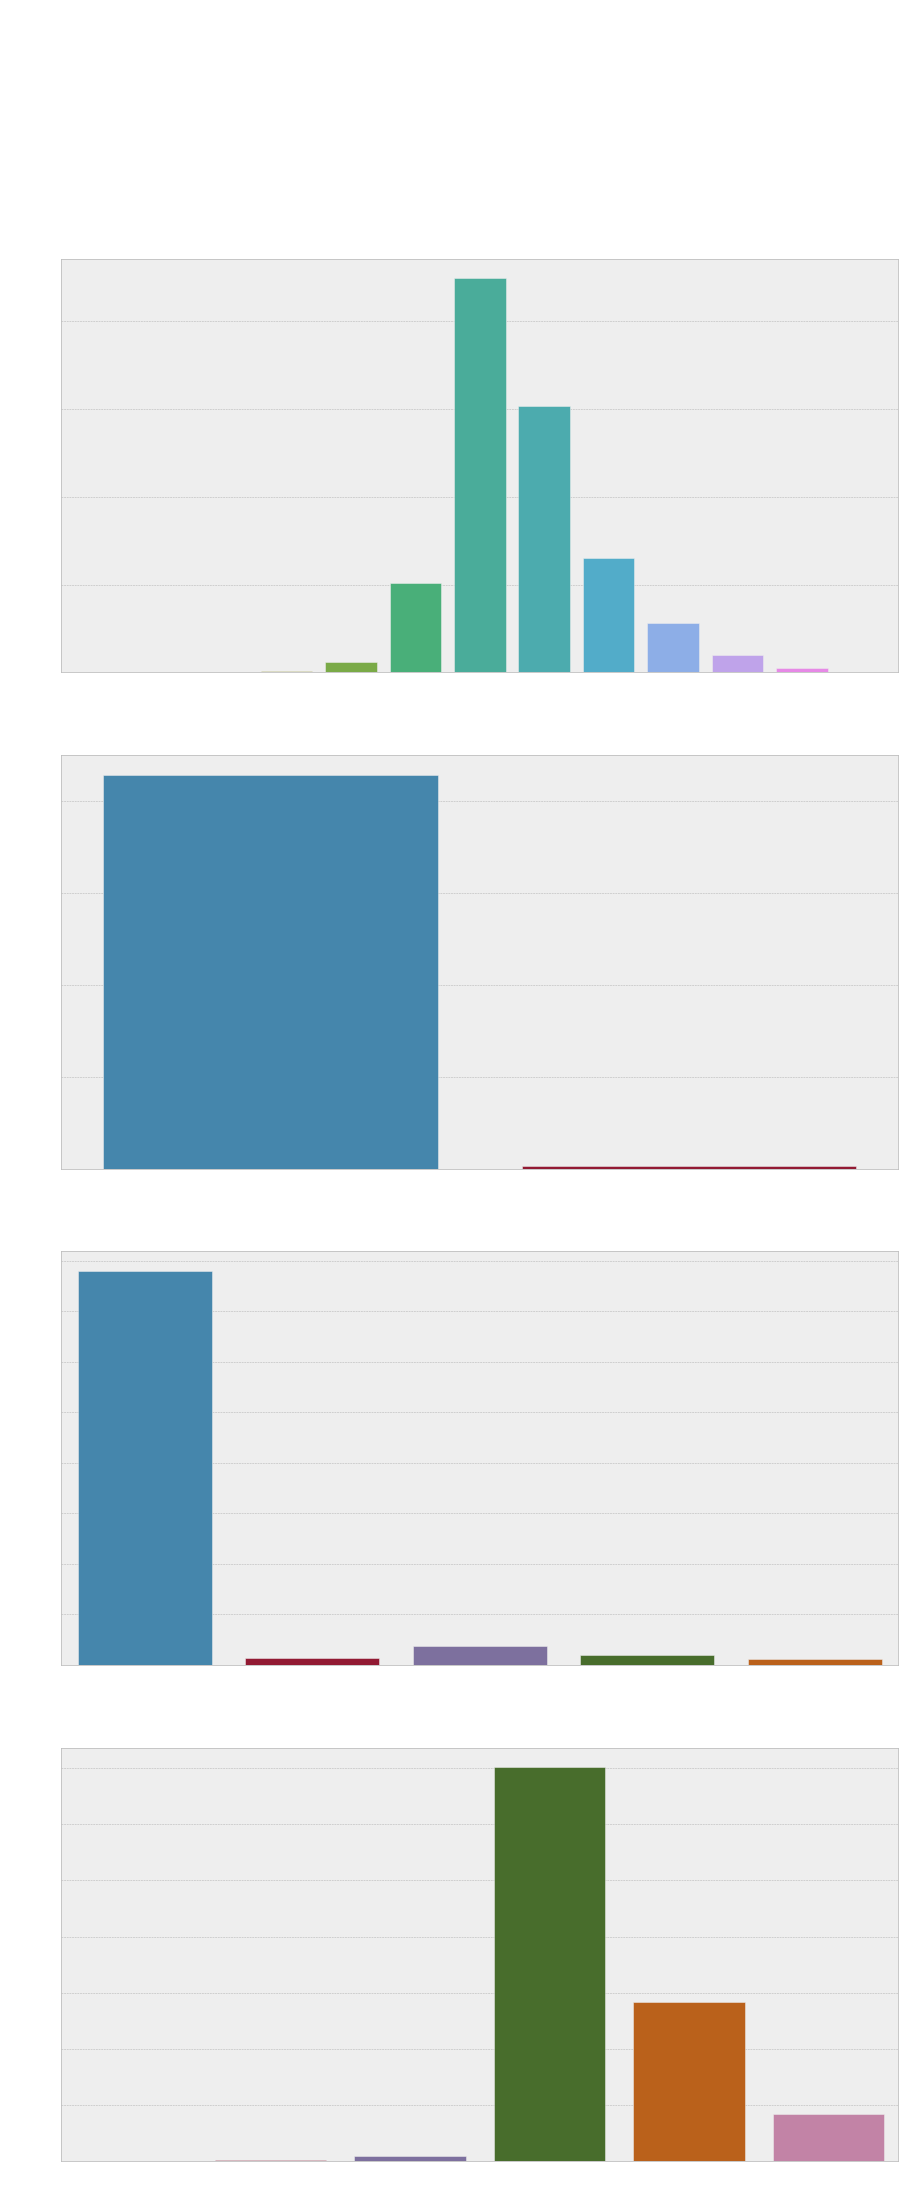

In [0]:
# Plotting sublots for our categorical variables.
#
fig, (ax) = plt.subplots(4, figsize=(15,35))
fig.suptitle('Frequency Distributions')
ax = ax.flatten()

#iterating our columns as we plot
for i, col in enumerate(n_categorical):
    sns.barplot(n_categorical[col].value_counts().keys(),n_categorical[col].value_counts(), ax=ax[i])
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Count', fontsize=16)
      
plt.show()

Conclusion

> * In the above plots we see the number of houses that fit into the various categories such which one has a waterfront or not

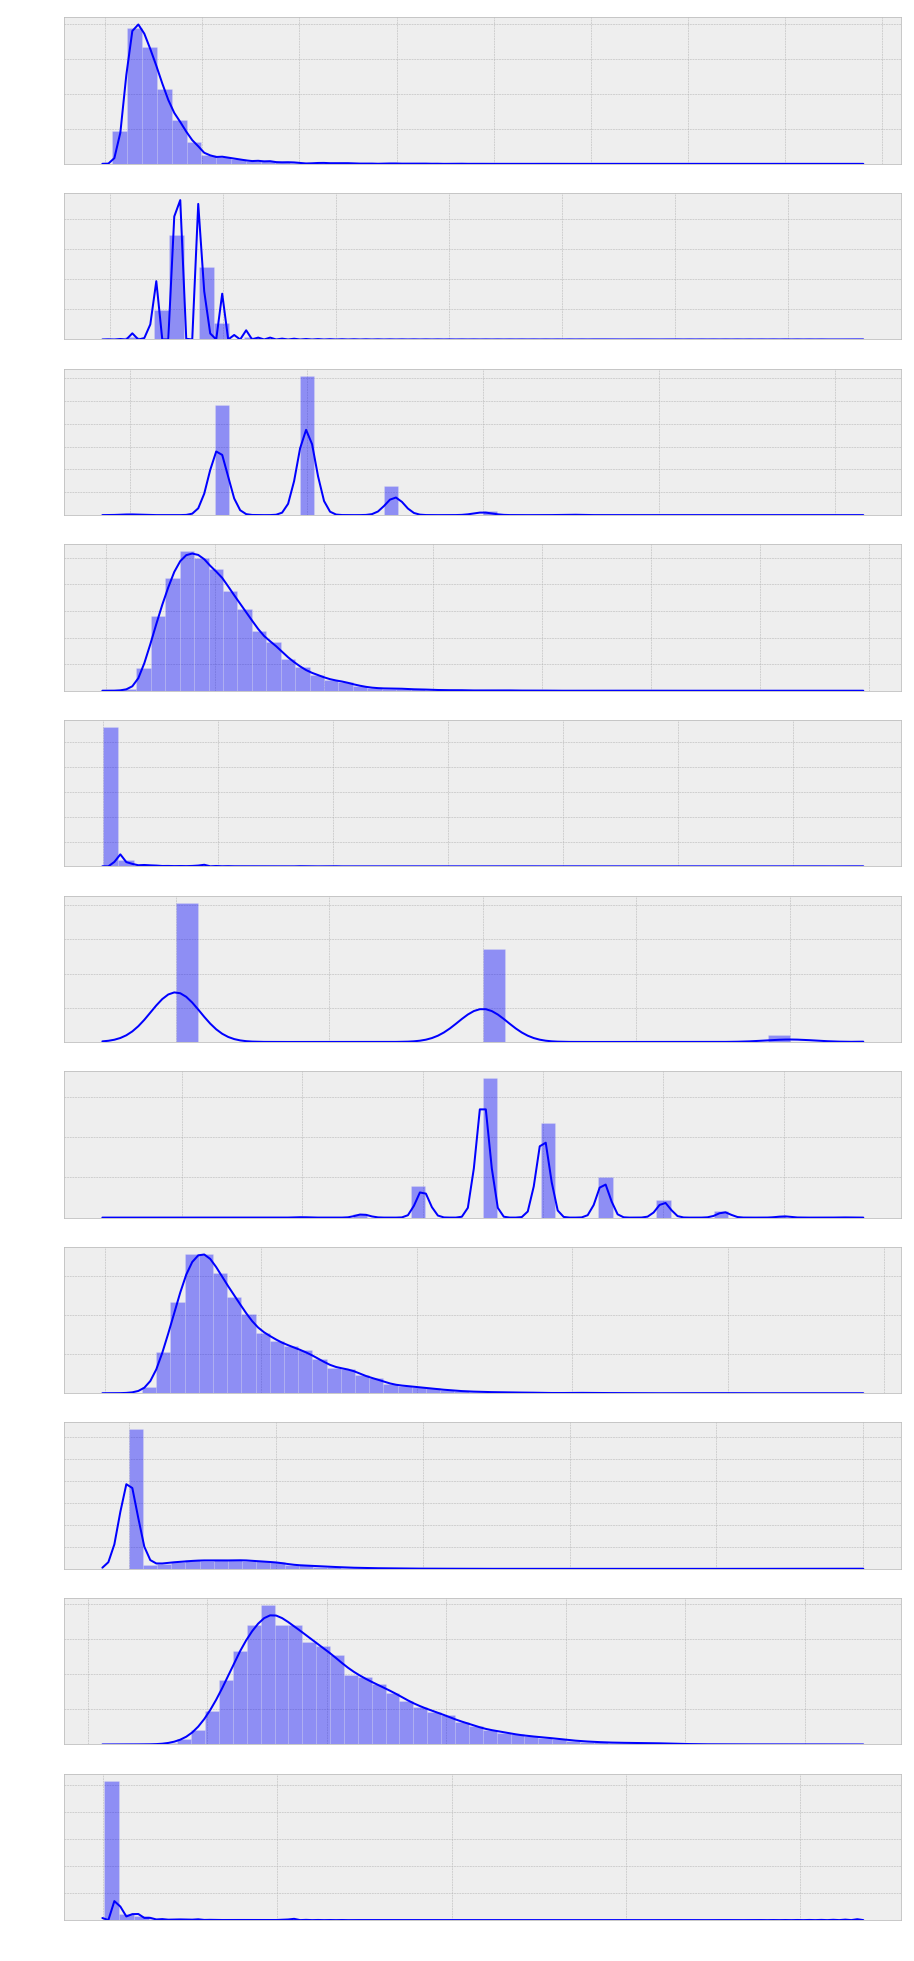

In [0]:
# Frequency distribution for our numeric variables
#
fig, ax = plt.subplots(len(numerical_df.columns), figsize=(15,35))

for i, col_val in enumerate(numerical_df):
  sns.distplot(numerical_df[col_val], hist=True, ax=ax[i], color='blue')
  ax[i].set_xlabel(col_val, fontsize=16)
  ax[i].set_ylabel('Count', fontsize=16)

plt.show()

### Conclusion



>* Most of the data tends to be skewed toward the right side near the zero mark.

### Pie charts

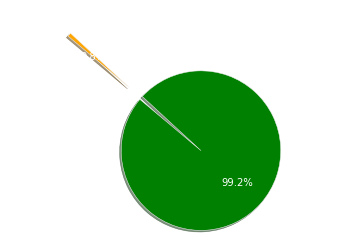

In [0]:
#plotting our frequencies on pie charts to visualise our percentage distributions
#
labels = ['False', 'True']
sizes  = [DF['waterfront'].value_counts()]
colors = ['green','orange']

# Highlights a particular Value in plot
explode = (0.2, 1)  

# Plotting our pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Pie Chart of houses with waterfronts')
plt.show()

## Bivariate analysis

<function matplotlib.pyplot.show>

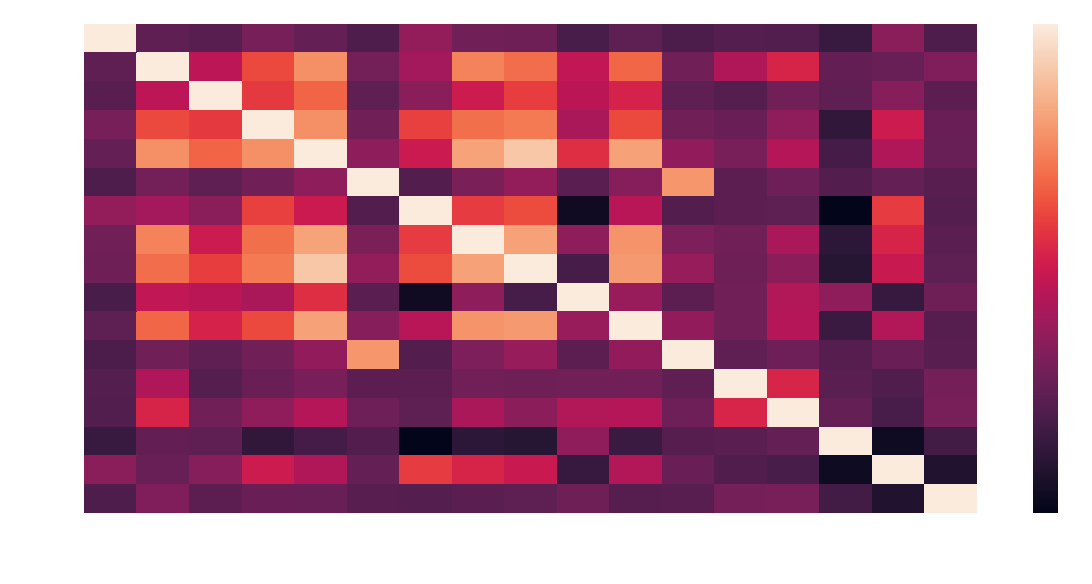

In [0]:
#heatmap
#checking for correlation using spearman method
plt.figure(figsize=(20,9))
sns.heatmap(DF.corr())
plt.xticks( rotation=45)
plt.title('Correlation between variables')
plt.show

Text(0.5, 1.0, 'Pairplot of Numeric variables.')

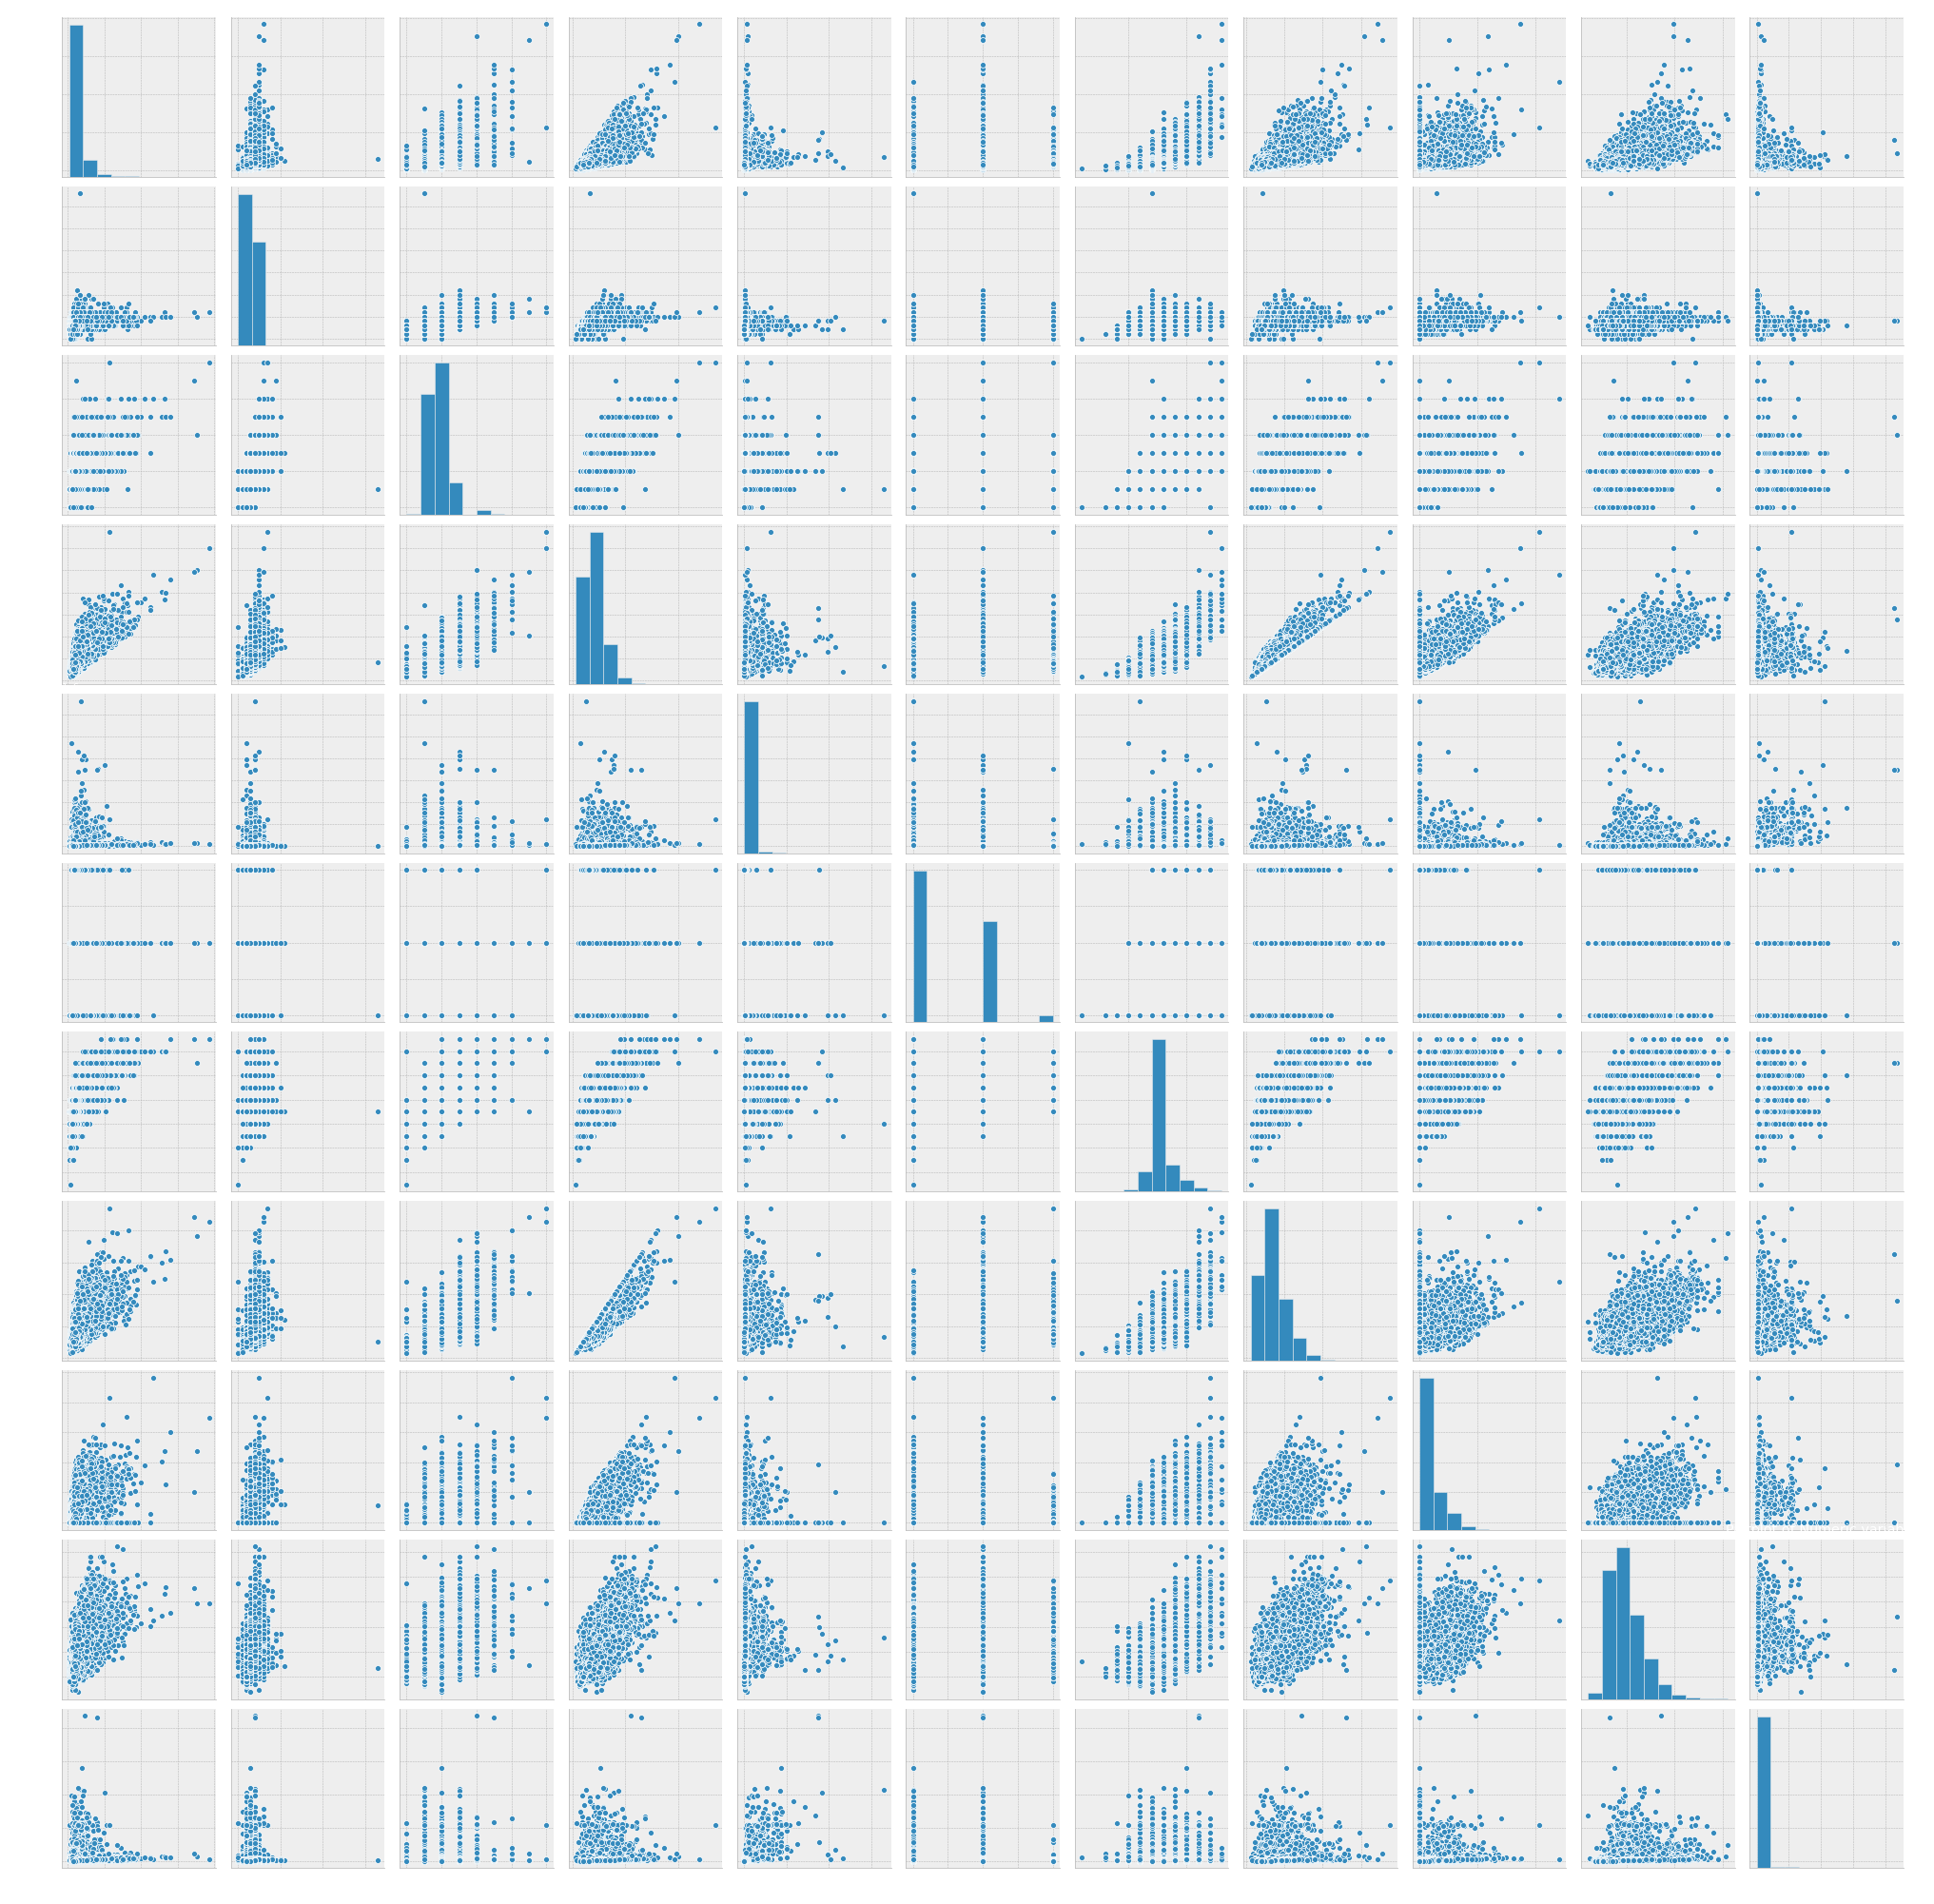

In [0]:
# drawing scatter plots on numeric variables to visualize any correlation
#
sns.pairplot(numerical_df)
plt.title("Pairplot of Numeric variables.")

### Conclusion

> * As observed from our analysis,it is observed that the price is greatly affected by the grade,square feet above,the number of bathrooms and square feet of the living room.

> * Other factors that affect the price of the house include the presence of a waterfront,number of bedrooms and square feet of the parking layout.

## Multivariate analysis

In [0]:
PD=DF[["price","bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view","condition","grade","sqft_above","sqft_basement","yr_built","yr_renovated","sqft_living15","sqft_lot15"]]
print(PD.shape)
PD.head(5)

(21610, 16)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,1340,5650
1,538000,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,1690,7639
2,180000,2,1,770,10000,1,0,0,3,6,770,0,1933,0,2720,8062
3,604000,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,1360,5000
4,510000,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,1800,7503


In [0]:
PD.dtypes

price            int64
bedrooms         int64
bathrooms        int64
sqft_living      int64
sqft_lot         int64
floors           int64
waterfront       int64
view             int64
condition        int64
grade            int64
sqft_above       int64
sqft_basement    int64
yr_built         int64
yr_renovated     int64
sqft_living15    int64
sqft_lot15       int64
dtype: object

In [0]:
# Checking for null values
#
# ----
PD.isnull().values.any()

False

In [0]:
PD.dropna(how='all')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,1340,5650
1,538000,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,1690,7639
2,180000,2,1,770,10000,1,0,0,3,6,770,0,1933,0,2720,8062
3,604000,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,1360,5000
4,510000,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21605,610685,4,2,2520,6023,2,0,0,3,9,2520,0,2014,0,2520,6023
21606,1010000,4,3,3510,7200,2,0,0,3,9,2600,910,2009,0,2050,6200
21607,475000,3,2,1310,1294,2,0,0,3,8,1180,130,2008,0,1330,1265
21608,360000,3,2,1530,1131,3,0,0,3,8,1530,0,2009,0,1530,1509


In [0]:
float_col = PD.select_dtypes(include=['float64']) # This will select float columns only
# list(float_col.columns.values)
for col in float_col.columns.values:
  PD[col] = PD[col].astype('int64')

PD.replace([np.inf, -np.inf], np.nan, inplace=True)
PD.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,1340,5650
1,538000,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,1690,7639
2,180000,2,1,770,10000,1,0,0,3,6,770,0,1933,0,2720,8062
3,604000,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,1360,5000
4,510000,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,1800,7503


In [0]:
PD.price.describe()

count    2.161000e+04
mean     5.401268e+05
std      3.674374e+05
min      0.000000e+00
25%      3.211452e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

## Collinearity

In [0]:
CT = PD.corr()
CT.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
price,1.000000,0.308722,0.510347,0.702150,0.089699,0.237684,0.266308,0.397456,0.037352,0.666748,0.605711,0.323899,0.053145,0.126516,0.585539,0.082516
bedrooms,0.308722,1.000000,0.467960,0.577014,0.031806,0.156946,-0.006547,0.079476,0.030878,0.358869,0.478053,0.303061,0.147548,0.018753,0.392380,0.029381
bathrooms,0.510347,0.467960,1.000000,0.698126,0.085354,0.485697,0.058802,0.177512,-0.124110,0.606833,0.640213,0.250971,0.357728,0.060717,0.510458,0.080855
sqft_living,0.702150,0.577014,0.698126,1.000000,0.172852,0.354036,0.103806,0.284615,-0.057080,0.762265,0.876674,0.435050,0.266149,0.055337,0.756583,0.183325
sqft_lot,0.089699,0.031806,0.085354,0.172852,1.000000,-0.008738,0.021601,0.074754,-0.008714,0.113628,0.183552,0.015275,0.044370,0.007679,0.144642,0.718557


In [0]:
#dataframe with the inverse of the correlations matrix for housing data
#use these correlations to compute the VIF score for each variable
pd.DataFrame(np.linalg.inv(CT.values), index = CT.index, columns= CT.columns)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
price,2.764095,0.256872,-0.222004,1.764319e-01,-0.001271,0.029057,-0.374764,-0.283924,-0.203331,-1.030633,-1.160674e+00,-6.493149e-01,0.514971,-0.121706,-0.105703,0.132281
bedrooms,0.256872,1.640117,-0.298979,-1.683583e+00,0.046592,0.108125,0.026330,0.085003,-0.105066,0.205266,4.597953e-01,2.295377e-01,-0.003968,-0.000631,0.009483,0.104509
bathrooms,-0.222004,-0.298979,2.384311,-1.079852e-01,-0.022575,-0.602942,0.044417,0.004095,0.039273,-0.117311,-8.052610e-01,-6.155156e-01,-0.267978,-0.094110,0.157680,0.029415
sqft_living,0.171366,-1.686117,-0.112710,2.956220e+13,-0.150141,1.072463,-0.130601,-0.107613,0.280984,-5.129917,-2.665375e+13,-1.424100e+13,0.871867,0.256244,0.504865,-0.076775
sqft_lot,-0.001271,0.046592,-0.022575,-1.488129e-01,2.088435,0.086007,0.028542,-0.052844,0.016318,-0.004714,-9.651035e-02,5.053919e-02,0.004492,0.008726,0.125459,-1.473576
floors,0.029057,0.108125,-0.602942,1.072651e+00,0.086007,1.981203,-0.009190,-0.038183,0.209419,-0.396023,-1.404807e+00,-2.073086e-02,-0.422205,-0.029913,0.278239,0.108907
waterfront,-0.374764,0.026330,0.044417,-1.299548e-01,0.028542,-0.009190,1.254102,-0.454444,0.015292,0.185743,1.394430e-01,1.351897e-01,-0.086720,-0.047873,0.072394,-0.035039
view,-0.283924,0.085003,0.004095,-1.095583e-01,-0.052844,-0.038183,-0.454444,1.424528,-0.015079,-0.070131,2.440209e-01,-1.657938e-01,0.081172,-0.044746,-0.245533,-0.006936
condition,-0.203331,-0.105066,0.039273,2.804927e-01,0.016318,0.209419,0.015292,-0.015079,1.159472,0.078181,-1.902721e-01,-2.146483e-01,0.140863,0.125337,0.064430,-0.029346
grade,-1.030633,0.205266,-0.117311,-5.135019e+00,-0.004714,-0.396023,0.185743,-0.070131,0.078181,3.610640,3.465858e+00,2.102486e+00,-0.571963,0.023802,-0.790467,0.066419


Most VIF scores are less than 5 with values ranging from -2 to 5 with others going from 6 to 8.

## Hyperparameter tuning

In [0]:
X = DF.drop(['price'],axis=1)
y = DF['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


### Approach one
Tuning using cross-validation

In [0]:
%%time
# Here, we increase the number of trees while reducing the learning rate with the same factor.
# First, we try with a five fold cross validation.

scores = cross_val_score(LGBMRegressor(n_estimators=1000, learning_rate=0.01), X, y, cv=5, scoring='neg_root_mean_squared_error')
print(scores)
print(np.mean(scores))

[-190249.1027766  -182899.77696065 -169425.72701303 -176223.30499437
 -192694.33393796]
-182298.4491365239
CPU times: user 32.5 s, sys: 847 ms, total: 33.4 s
Wall time: 16.9 s


In [0]:
%%time
# We increase the number of folds to 6
# 

scores = cross_val_score(LGBMRegressor(n_estimators=1000, learning_rate=0.01), X, y, cv=6, scoring='neg_root_mean_squared_error')
print(scores)
print(np.mean(scores))

[-179405.74166629 -181430.58057791 -188964.13981561 -172929.72156329
 -175797.4303047  -199769.68292431]
-183049.5494753515
CPU times: user 39.6 s, sys: 1.03 s, total: 40.7 s
Wall time: 20.6 s


### Approach two 
Tuning using Random Search

In [0]:
%%time
# Random search reduces the number of iterations by using  random combination of the hyperparameter grid.
# It's therefore inexpensive computationally.
est = RandomizedSearchCV(LGBMRegressor(), {
    'n_estimators': [900, 1000],
    'learning_rate': np.arange(0.01, 0.1, 0.02),
    'num_leaves': [25,30,35]
}, cv=7, scoring='neg_root_mean_squared_error', n_iter=8)
est.fit(X, y)
pd.DataFrame(est.cv_results_)[['param_n_estimators', 'param_learning_rate', 'param_num_leaves','mean_test_score']]

CPU times: user 5min 3s, sys: 8.35 s, total: 5min 11s
Wall time: 2min 37s


In [0]:
est.best_params_

{'learning_rate': 0.03, 'n_estimators': 1000, 'num_leaves': 30}

In [0]:
est.best_score_

-184091.2171770884

## Linear regression

In [0]:

X = PD.drop(['price'],axis=1)
y = PD[['price']]

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

LinearRegression()

#Fitting the Linear Regression to the dataset  
from sklearn.linear_model import LinearRegression  
lreg= LinearRegression()  
lreg.fit(X,y)

from pandas import Series, DataFrame
print('---Linear Regression Model--')
lreg = LinearRegression()
#training the model
lreg.fit(X_train,y_train)

#predicting on cv
pred = lreg.predict(X_train)

#calculating mse
mse = np.mean((pred - X_train)**2)
print('\nMean Sqaured Error are:\n ', mse )
mse0 = (mean_squared_error(y_true=y,y_pred=lreg.predict(X)))
print('\n\nMean Squared Error = ',mse0)
print('\n\nModel performance on Test data = ')
print(lreg.score(X_train,pred))


---Linear Regression Model--

Mean Sqaured Error are:
  bedrooms         3.837164e+11
bathrooms        3.837180e+11
sqft_living      3.809813e+11
sqft_lot         3.665350e+11
floors           3.837186e+11
waterfront       3.837202e+11
view             3.837197e+11
condition        3.837165e+11
grade            3.837113e+11
sqft_above       3.814021e+11
sqft_basement    3.832984e+11
yr_built         3.815848e+11
yr_renovated     3.835899e+11
sqft_living15    3.812656e+11
sqft_lot15       3.691651e+11
dtype: float64


Mean Squared Error =  48896500775.08463


Model performance on Test data = 
1.0


In [0]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# This is our prediction for price based on our model
y_predict = regressor.predict(X_test)
print(y_predict, y_test)

[[1131537.50259986]
 [ 296282.01057956]
 [ 323624.35535264]
 ...
 [ 285873.69656956]
 [ 662084.49318707]
 [ 512359.37641654]]          price
9789    900000
10279   405000
21569   329000
20057   434900
21201  2230000
...        ...
17760   325000
13210   635000
8107    330000
19726   950968
16121   240000

[4322 rows x 1 columns]


#### Residual plots and Heteroskedasticity testing

In [99]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = PD.drop(['price'],axis=1)
y = PD['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# This is our prediction for admission based on our model
y_predict = regressor.predict(X_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset
residuals = np.subtract(y_predict, y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

,price
count,4.322000e+03
mean,7.345386e+03
std,2.140770e+05
min,-3.222523e+06
25%,-8.604089e+04
50%,1.400486e+04
75%,1.185300e+05
max,3.151434e+06


,price
count,4.322000e+03
mean,7.345386e+03
std,2.140770e+05
min,-3.222523e+06
25%,-8.604089e+04
50%,1.400486e+04
75%,1.185300e+05
max,3.151434e+06


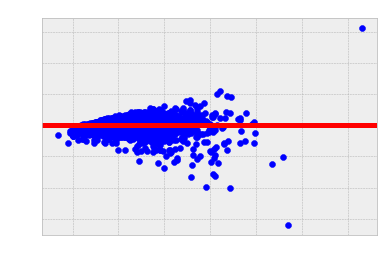

In [101]:
import matplotlib.pyplot as plt
plt.scatter(y_predict, residuals, color='blue')
plt.ylabel('residual')
plt.xlabel('price')
plt.axhline(y= residuals.mean(), color='red', linewidth=5)
plt.show()

In [100]:
#importing the library
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_predict, residuals)

#  compute a critical value of the chi squared distribution which helps to interpret the results 
degree_of_freedom = len(y_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(p_value)

# If the test_result is greater than the critical value, then the null hypothesis rejected. 
#This would mean that there are patterns to the variance of the data

# the null hypothesis that the variance is homogeneous across the data is accepted

if (test_result > critical_value):
  print('The variances are unequal, and the model should be reassessed')
else:
  print('The variances are homogeneous!')

4.712279316477941e-79
The variances are homogeneous!


## Ridge regression

In [0]:
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [0]:
# We now use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
# 
search.fit(X,y)
search.best_params_
{'alpha': 0.01}
abs(search.best_score_) 

49786913150.05791

In [0]:
# We can confirm this by fitting our model with the ridge information and finding the mean squared error below
#
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X,y)


48830586029.244576


In [0]:
ridge = Ridge()
ridge.fit(X_train,y_train)

mse1 = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
print('\n\nMean Squared Error = ',mse1)

# calculating coefficients
#coeff = DataFrame(X_train.columns)
#coeff['Coefficient Estimate'] = Series(ridge.coef_)
#print(coeff)

print('\n\nModel performance on Test data = ')
print(ridge.score(X_train,y_train))




Mean Squared Error =  48895048170.8253


Model performance on Test data = 
0.6431445101921108


In [0]:
#there is little difference between the ridge and baseline models. 
# This is confirmed with the coefficients of each model found below.
# 
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,PD.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

# The coefficient values are not the same. This means that the penalization has worked well with this dataset.

{'bathrooms': 39957.509084723104,
 'bedrooms': -36596.71743173877,
 'condition': 59.539206440278065,
 'floors': -8085.862424227855,
 'grade': 20.742703428560674,
 'price': 0.6825219039033552,
 'sqft_above': -0.6413603424261964,
 'sqft_basement': 575980.7715890473,
 'sqft_living': 110.25283752972359,
 'sqft_living15': -1837.820019064379,
 'sqft_lot': 0.005248761401162483,
 'sqft_lot15': 40.438788972906366,
 'view': 50.71363113253619,
 'waterfront': 116183.87873152227,
 'yr_built': 49275.73318086988,
 'yr_renovated': 41701.31223179242}

## Lasso regression

In [0]:
# Scaling data 
#
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [0]:
# We can basically build the Lasso model. 
# But for now, we will train it on the whole dataset and look at an R-squared score and on the model coefficients. 
# Note, that we are not setting the alpha, it is defined as 1.
# 

# Importing linear models
# 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Creating lasso object
# 
lasso = linear_model.Lasso() 

# Fitting the models
# 
lasso.fit(X, y) 

# Print scores, MSE, and coefficients
# 
print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso coef:", lasso.coef_) 

lasso score: 0.6383462856976216
lasso MSE: 48824684648.49597
lasso coef: [ 4.25682070e+03 -3.40648938e+04  2.93622408e+04  2.48007364e+05
  2.14541204e+02 -4.46071239e+03  1.36971356e+05 -9.02644978e+04
 -4.43202394e+04  1.42186302e+04 -1.75093874e+04  4.98337351e+04
  3.77503711e+04  2.71869610e+04 -6.88077837e+04  1.62347665e+04]


In [0]:
print('\n\n---------Training Lasso Regression Model----------------')
lasso = Lasso()
lasso.fit(X_train,y_train)
mse2 = (mean_squared_error(y_true=y,y_pred=lasso.predict(X)))
print('\n\nMean Squared Error = ',mse2)

# calculating coefficients
#coeff = DataFrame(X_train.columns)
#coeff['Coefficient Estimate'] = Series(lasso.coef_)
#print(coeff)
print('\n\nModel performance on Test data = ')
print(lasso.score(X_test,y_test))



---------Training Lasso Regression Model----------------


Mean Squared Error =  48896464235.44606


Model performance on Test data = 
0.6124193993084803


In [0]:
coeff = DataFrame(X_train.columns)
coeff['Coefficient Estimate'] = Series(lasso.coef_)
print(coeff)

                0  Coefficient Estimate
0        bedrooms         -36637.166232
1       bathrooms          39964.933512
2     sqft_living            292.741968
3        sqft_lot              0.055135
4          floors          -5517.105495
5      waterfront         601597.898108
6            view          49102.590901
7       condition          39548.773681
8           grade         114509.116729
9      sqft_above           -126.523410
10  sqft_basement           -122.020268
11       yr_built          -2010.182164
12   yr_renovated             39.012928
13  sqft_living15             21.998541
14     sqft_lot15             -0.717254


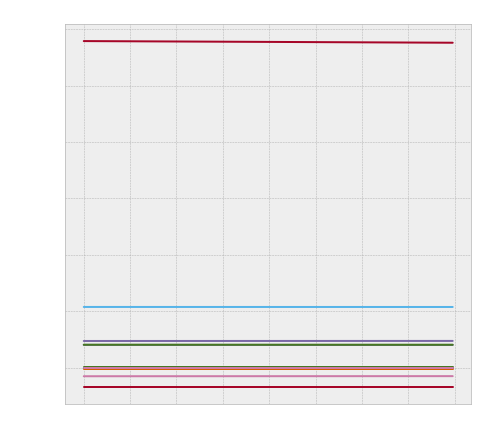

In [0]:
# Importing library for visualization
#
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
import matplotlib.pyplot as plt
coefsLasso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array
# 
alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots
# 
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()


## Elaso Net Regression

In [0]:
elastic=ElasticNet(normalize=True,alpha=0.001,l1_ratio=0.75)
search = GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)
elastic=ElasticNet(normalize=True,alpha=0.001,l1_ratio=0.75)


In [0]:
# Elastic Net Model
# Elastic net, just like ridge and lasso regression, requires normalize data. 
# This argument  is set inside the ElasticNet function. 
# The second thing we need to do is create our grid.
# 
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [0]:
# We now use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
# 
search.fit(X,y)
search.best_params_
abs(search.best_score_) 

49786370622.31077

In [0]:
# Creating our linear regression model for the purpose of comparison
# 
regression=LinearRegression()
regression.fit(X,y)
first_model=(mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print(first_model)
 

48842010316.02092


In [0]:
# The best hyperparameters was an alpha set to 0.001 and a l1_ratio of 0.8. 
# With these settings we got an MSE of 49786370622.31077. This is above our baseline model of MSE 48842010316.02092  for the baseline model. 
# Which means that elastic net is doing worse than linear regression. 
# For clarity, we will set our hyperparameters to the recommended values and run on the data.
# 
elastic=ElasticNet(normalize=True,alpha=0.001,l1_ratio=0.75)
elastic.fit(X,y)
second_model=(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
print(second_model)

82655157903.5752


In [0]:
print('\n\n---------Training Elastic Regression Model----------------')
elastic=ElasticNet(normalize=True,alpha=0.001,l1_ratio=0.75)
elastic.fit(X_train,y_train)
mse3 = (mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
print('\n\nMean Squared Error = ',mse3)

# calculating coefficients
#coeff = DataFrame(X_train.columns)
#coeff['Coefficient Estimate'] = Series(lasso.coef_)
#print(coeff)
print('\n\nModel performance on Test data = ')
print(elastic.score(X_test,y_test))



---------Training Elastic Regression Model----------------


Mean Squared Error =  4.340036660196926e+16


Model performance on Test data = 
0.5447338889202384


## Conclusion 

From the previous processes